# Activity: 1A

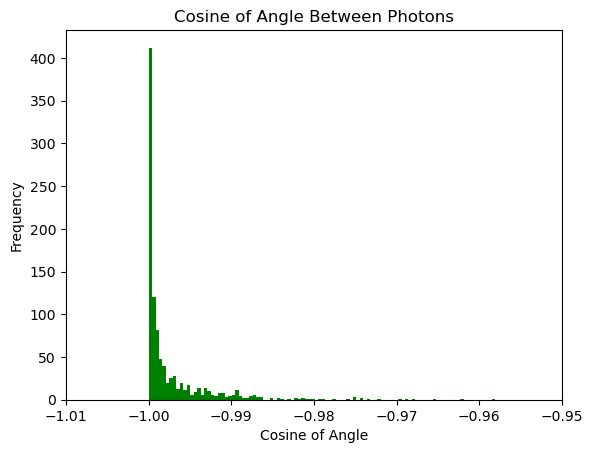

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# constants
mp0 = 134.8  # Mass of pi0 in MeV
E = mp0/2
sigma = 0.1  # Gaussian resolution of 10%

# generate 1000 events
np.random.seed(42)  # for reproducibility
events = 1000

# generate random angles
theta = np.random.uniform(0, 2 * np.pi, events)

# momenta components
px = E * np.cos(theta)
pz = E * np.sin(theta)

# calculate components of the smeared momenta vectors
p1_smr = np.array([np.random.normal(px, np.abs(sigma*px)), np.random.normal(pz, np.abs(sigma*pz))])
p2_smr = np.array([np.random.normal(-px, np.abs(sigma*px)), np.random.normal(-pz, np.abs(sigma*pz))])

# calculate magnitude p1_smr, p2_smr
p1_mag = np.sqrt(p1_smr[0]**2 + p1_smr[1]**2)
p2_mag = np.sqrt(p2_smr[0]**2 + p2_smr[1]**2)
cos_angle = ((p1_smr[0]*p2_smr[0]) + (p1_smr[1]*p2_smr[1])) / (p1_mag*p2_mag)

# plot the cosine of the angle between the two photons
plt.hist(cos_angle, bins=100,color='g')
plt.xlim(-1.01,-0.95)
plt.title('Cosine of Angle Between Photons')
plt.xlabel('Cosine of Angle')
plt.ylabel('Frequency')
plt.show()


# Activity: 1B

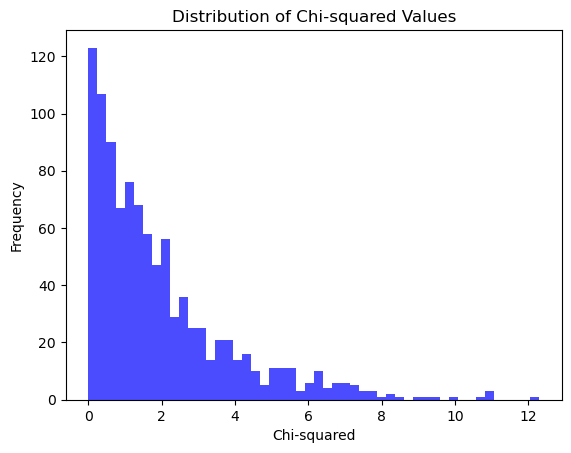

In [3]:
# calculate chi square and open angle
chi_sq = []
op_ang = []
dp = []
p_new = []
for i in range(len(px)):
    D = np.array([[1,0,1,0],[0,1,0,1]])
    d = np.array([[ p1_smr[0][i]+p2_smr[0][i]] , [p1_smr[1][i]+p2_smr[1][i] ]])
    V_al = np.array([[np.abs(sigma*px[i])**2,0,0,0] , 
                     [0,np.abs(sigma*pz[i])**2,0,0] , 
                     [0,0,np.abs(sigma*px[i])**2,0] , 
                     [0,0,0,np.abs(sigma*pz[i])**2] ])
    V_d = np.linalg.inv(np.dot(np.dot(D, V_al), D.T))
    lam = np.dot(V_d,d)
    diff_p = - np.dot(np.dot(V_al,D.T),lam)
    chi_sq.append(np.dot(np.dot(lam.T,np.linalg.inv(V_d)),lam)[0,0])
 
    opening_angle = np.arccos((p1_smr[0][i] * (-p1_smr[0][i] - lam[0][0]) +
                               p1_smr[1][i] * (-p1_smr[1][i] - lam[1][0])) / (p1_mag[i] * np.sqrt((-p1_smr[0][i] - lam[0][0]) ** 2 +
                               (-p1_smr[1][i] - lam[1][0]) ** 2)))
    op_ang.append(opening_angle)
    dp.append(diff_p)
    
#dp = np.array(dp)
#print(dp[0])
#print(np.mean(chi_sq))
# plot chi square distribution
plt.hist(chi_sq, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Chi-squared Values')
plt.xlabel('Chi-squared')
plt.ylabel('Frequency')
plt.show()



# Activity: 1C,1D

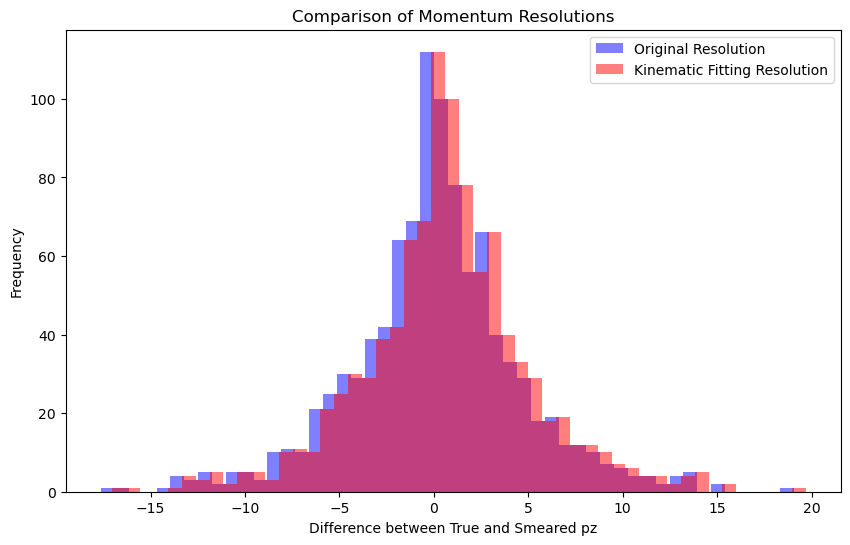

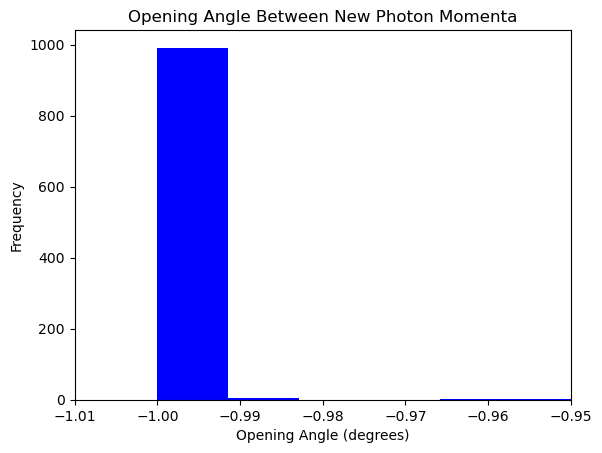

In [6]:
# differences for original resolution
del_pz_or = p1_smr[1] - pz

# differences for the new resolution 
del_pz_kin= p1_smr[1] - (pz + lam[1]) 

# plot histograms to compare resolutions
plt.figure(figsize=(10, 6))

plt.hist(del_pz_or, bins=50, color='blue', alpha=0.5, label='Original Resolution')
plt.hist(del_pz_kin, bins=50, color='red', alpha=0.5, label='Kinematic Fitting Resolution')

plt.title('Comparison of Momentum Resolutions')
plt.xlabel('Difference between True and Smeared pz')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# plot opening angles
plt.hist(np.cos(op_ang), bins=100, color='b')
plt.xlim(-1.01,-0.95)
plt.title('Opening Angle Between New Photon Momenta')
plt.xlabel('Opening Angle (degrees)')
plt.ylabel('Frequency')
plt.show()